In [1]:
!ls

'┴ª6╚╕ L.POINT Big Data Competition-╡Ñ└╠┼═ ╝│╕φ╝¡.pdf'
'┴ª6╚╕ L.POINT Big Data Competition-╝│╕φ╚╕ └┌╖ß.pdf'
 거래정보.csv
 상품분류정보.csv
 온라인행동정보.csv
 고객demographic정보.csv
 Untitled.ipynb


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df_transaction = pd.read_csv("거래정보.csv")
df_category = pd.read_csv("상품분류정보.csv")
df_activation = pd.read_csv("온라인행동정보.csv")
df_demo = pd.read_csv("고객demographic정보.csv")

/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
print(df_transaction.shape)
df_transaction.head()

(599961, 9)


,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [5]:
print(df_category.shape)
df_category.head()

(1667, 4)


,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [6]:
print(df_activation.shape)
df_activation.head()

(3196362, 14)


,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


In [7]:
print(df_demo.shape)
df_demo.head()

(72399, 3)


,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown


## EDA

EDA를 해봅시다!

### 결측치 확인하기

In [8]:
df_activation.isnull().sum()

clnt_id                  0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit                 0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2544724
tot_pag_view_ct       1428
tot_sess_hr_v        57607
trfc_src                 0
dvc_ctg_nm         1782577
dtype: int64

**온라인 행동 정보**

|변수명(영문)|변수명(국문)|상세 설명|
|:--:|:------:|:-----|
|clnt_id|클라이언트 ID|- 고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|sess_id|세션 ID|- Web/App에 접속 후 세션이 시작될 때 부여된 순번 ID. <br/>- 하나의 클라이언트 ID에 여러개의 세션 ID가 접속될 수 있다.|
|hit_seq|조회일련번호|- 조회 순서를 알 수 있도록 부여된 일련번호|
|action_type|행동유형|- 총 8가지 행동 유형을 구분한 코드<br/>- 0 : 검색 / 1 : 제품 목록 / 2 : 제품 세부정보 보기 / 3 : 장바구니 제품 추가 / 4 : 장바구니 제품 삭제 / 5 : 결제 시도 / 6 : 구매 완료 / 7 : 구매 환불 / 8 : 결제 옵션|
|biz_unit|업종 단위|- 온라인 및 오프라인 이용처를 구분하는 단위 코드|
|sess_dt|세션 일자|- 세션 일자 (YYYYMMDD 형식으로 표기)|
|hit_tm|조회 시각|- 조회 시각 (HH-MM 형식으로 표기)|
|hit_pss_tm|조회경과시간|- 세션이 시작된 이후 해당 조회까지 경과한 시간(단위 : 밀리초)<br/>- 첫번째 조회면 0으로 설정|
|trans_id|거래 ID|- 구매 내역을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|sech_kwd|검색 키워드|- 고객이 검색한 키워드|
|tot_pag_view_ct|총 페이지 조회 건수|- 세션 내의 총 페이지(화면) 뷰 수|
|tot_sess_hr_v|총 세션 시간 값|- 세션 내 총 시간(단위 : 초)|
|trfc_src|유입 채널|- 고객이 유입된 채널<br/>-  DIRECT / PUSH / WEBSITE / PORTAL_1 / PORTAL_2 / PORTAL_3 / unknown|
|dvc_ctg_nm|기기  유형|- 기기 유형<br/>- mobile_web / mobile_app / PC

우리가 집중해서 봐야할 데이터 프레임입니다. 많은 정보들이 들어있는데, 다른 데이터 프레임의 정보를 이것과 합쳐서 보도록 합시다.

In [10]:
df_transaction.isnull().sum()

clnt_id      0
trans_id     0
trans_seq    0
biz_unit     0
pd_c         0
de_dt        0
de_tm        0
buy_am       0
buy_ct       0
dtype: int64

**거래 정보**

|변수명(영문)|변수명(국문)|상세 설명|
|:--:|:------:|:-----|
|clnt_id|클라이언트 ID|- 고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|trans_id|거래 ID|- 구매 내역을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|trans_seq|거래 일련 번호|- 해당 거래 ID의 구매 내역 내 구매 순서를 알 수 있도록 부여된 일련번호|
|biz_unit|업종 단위|- 온라인 및 오프라인 이용처를 구분하는 단위 코드|
|pd_c|상품소분류코드|- 상품의 소분류 코드|
|de_df|구매일자|- 상품을 구매한 일자 (YYYYMMDD 형식)|
|de_tm|구매시각|- 상품을 구매한 시각 (HHMM 형식)|
|buy_am|구매금액|- 구매한 상품의 금액|
|buy_ct|구매수량|- 구매한 상품의 수량|

우리가 주로 봐야할 것은 저 위에 있는 온라인 행동 정보를 나타내는 `df_activation` 데이터 프레임이 될 것 같습니다. 이 데이터에 다른 데이터 프레임의 정보를 merge하는 방식을 취해줄 거에요.

그런데 거래정보에서 약간의 특이점이 있는 것 같습니다. 온라인 행동 정보에는 `trans_id`에 결측치가 보이는데 거래정보는 그렇지가 않아요. 아마도 온라인 행동 정보에는 구매하지 않고 그냥 검색만 한다던가, 제품을 보기만 해서 그럴 수 있을 것 같습니다. 어쨌든 이 데이터는 더해주도록 합시다!

In [11]:
df_demo.isnull().sum()

clnt_id        0
clnt_gender    0
clnt_age       0
dtype: int64

**고객 Demographic 정보**

|변수명(영문)|변수명(국문)|상세 설명|
|:--:|:------:|:-----|
|clnt_id|클라이언트 ID|- 고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|clnt_gender|성별|- 성별 정보(남자 : M / 여자 : F / 정보 없음 : unknown)|
|clnt_age|연령대|- 연령대 정보 <br/>- 10대 이하/ 20대 / 30대 / 40대 / 50대 / 60대 이상 / 정보 없음 :unknown|

여기서는 unknown이라는 값이 계속 보이네요. 얘만 따로 한번 이따가 확인해줍시다.

In [12]:
df_category.isnull().sum()

pd_c        0
clac_nm1    0
clac_nm2    0
clac_nm3    2
dtype: int64

**상품 분류 정보**

|변수명(영문)|변수명(국문)|상세 설명|
|:--:|:------:|:-----|
|pd_c|상품 소분류코드|- 상품의 소분류코드(최소단위)|
|clac_nm1|상품 대분류명|- 상품 대분류명|
|clac_nm2|상품 중분류명|- 상품 중분류명|
|clac_nm3|상품 소분류명|- 상품 소분류명|

여기까지 잘 확인할 수 있었습니다! 이제 데이터의 분포를 한번 살펴봅시다.

### 데이터 분포 확인하기

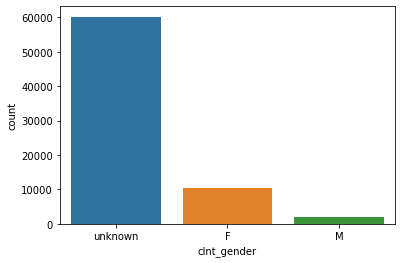

In [21]:
import seaborn as sns

sns.countplot(df_demo['clnt_gender'])
plt.show()

먼저 고객들의 성별 정보부터 한번 확인해보았습니다. 일단 unknown이 압도적으로 많고, 여자와 남자를 비교했을 때 여자가 훨씬 많네요.

주 고객층은 여성이 될 것 같습니다.

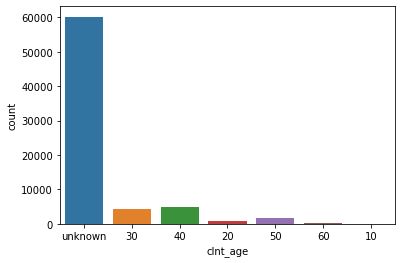

In [25]:
sns.countplot(df_demo['clnt_age'])
plt.show()

이번에는 연령대별 정보를 한번 확인해보았습니다. 여기서도 마찬가지로 unknown이 가장 많고 40대, 30대, 50대 순으로 많네요. 10대는 많이 없어 보입니다.

In [33]:
df_category['clac_nm1'].nunique()

60

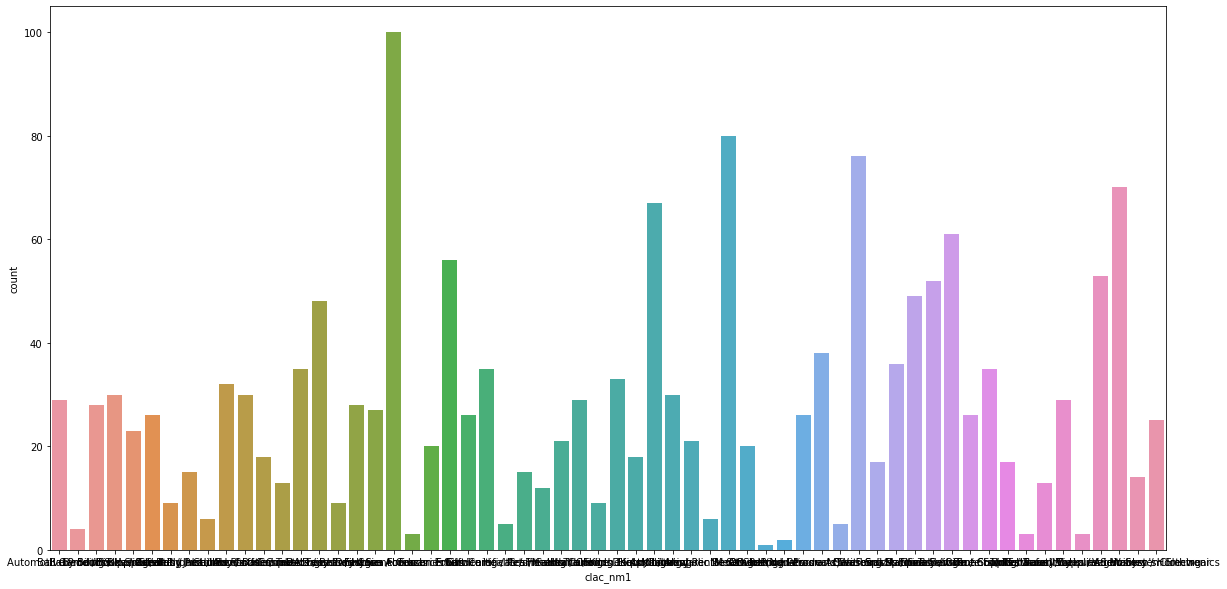

In [37]:
plt.figure(figsize=(20, 10))
sns.countplot(df_category['clac_nm1'])
plt.show()

상품 카테고리의 분류도 어떤건 많고, 어떤건 적네요. 

In [41]:
print(df_category['clac_nm1'].unique())

['Automotive Products' 'Baby Foods' 'Ball Game / Field Sports'
 'Bedding / Handicraft' 'Beverages' 'Birth Supplies / Baby Products'
 'Books / Records / Instruments' 'Canned / Jarred Foods'
 'Cell Phones / Accessories' 'Chilled Foods'
 'Cleaning / Laundry / Bathroom Accessories' 'Coffee / Tea' 'Computers'
 'Cooked Foods' 'Cosmetics / Beauty Care' 'Dairy Products'
 'Detergents / Hygiene Goods' 'Dried Sea Foods' 'Fashion Accessories'
 'Finance / Insurance Service' 'Frozen Foods' 'Fruits' 'Furniture'
 'Gardening / Pets' 'Gift Certificates / Cards' 'Grains'
 'Health / Fitness Training' 'Health Care' 'Health Foods'
 'Heating / Cooling Electronics' 'Home / Kitchen Appliances'
 'Home Decor / Lighting' "Kids' Clothing" 'Kitchenware'
 'Liquors / Alcoholic Beverages' 'Living / Rental Services' 'Meats'
 "Men's Clothing" 'Other Products' 'Others (Non-Products)'
 'Outdoor / Leisure Activities' 'Personal Care'
 'Refrigerators and Washing Machines' 'Sea Foods' 'Seasonal Sports'
 'Snack Foods' 'Spices 

이런 데이터들이 있는데.. 지금은 일단 대분류만 확인해도 나쁘지 않을 것 같다는 생각이 듭니다. 

In [43]:
df_transaction.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [45]:
print(df_transaction['biz_unit'].unique())

['A03' 'B01' 'B02' 'A02' 'A01' 'B03']


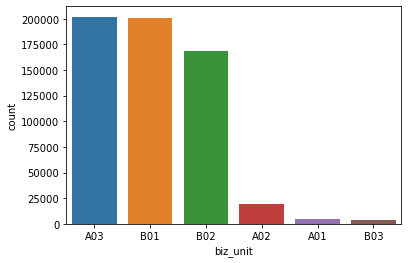

In [46]:
sns.countplot(df_transaction['biz_unit'])
plt.show()

`biz_unit`은 업종 분류 번호를 뜻하는 칼럼입니다. 정확히 무엇을 의미하는지는 모르겠지만 6개의 종류가 있고 `A03`, `B01`이 가장 많네요.

In [56]:
df_transaction['pd_c'].nunique()

1668

In [ ]:
df_transaction[df_]